In [12]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16, 3)

import pywt

In [2]:
signal = pd.read_csv("../datasets/ibm_returns.csv", header=None, index_col=0, names=["returns"]).squeeze()

In [3]:
signal = np.abs(signal)

In [4]:
'''
    jth level decomposition
    h_t: \tilde{h} = h / sqrt(2)
    v_j_1: v_{j-1}, the (j-1)th scale 
    return: w_j (or v_j)
    '''
j=1
x=signal
filters = "haar"
wavelet = pywt.Wavelet(filters)
h = wavelet.dec_hi
g = wavelet.dec_lo
h_t = np.array(h) / np.sqrt(2)
g_t = np.array(g) / np.sqrt(2)
wavecoeff = []
v_j_1 = x
N = len(v_j_1)
L = len(h_t)
w_j = np.zeros(N)
l = np.arange(L)


In [5]:
g_t

array([0.5, 0.5])

In [6]:
h_t

array([-0.5,  0.5])

In [7]:
N

368

In [8]:
L

2

In [9]:
for t in range(N):
    index = np.mod(t - 2 ** (j - 1) * l, N)
    v_p = np.array([v_j_1[ind] for ind in index])
    w_j[t] = (np.array(h_t) * v_p).sum()

In [10]:
w_j

array([ 3.78075380e-03, -2.22905624e-03, -2.18340958e-03,  4.42667460e-03,
        1.51788304e-17, -1.08108150e-03, -1.26483496e-02,  2.58248335e-03,
        1.13523968e-02,  1.01522878e-03, -4.02401757e-03,  5.05767090e-03,
       -1.00502546e-03,  1.00098514e-03, -5.07821812e-03,  5.06381700e-03,
       -1.03544277e-02,  2.04918320e-03,  5.23669294e-03, -5.81132364e-17,
       -1.07000216e-03,  2.03824620e-03,  2.07682586e-03,  2.81892565e-18,
       -1.04712080e-03, -5.29090660e-17, -2.10084343e-03,  5.29090660e-17,
        1.05152510e-03,  3.14137159e-03, -2.09643913e-03,  1.05150667e-03,
       -1.04712080e-03,  1.04273493e-03, -2.20676993e-06,  1.05152510e-03,
       -2.10970777e-03,  1.05374117e-03,  1.05596660e-03,  0.00000000e+00,
       -9.58495805e-03,  8.51084378e-03,  2.30249752e-06, -3.19260640e-03,
        4.26441817e-03, -4.26441817e-03, -2.11864724e-03, -2.00287540e-03,
        1.16187293e-03,  5.17907525e-03,  1.02354181e-03,  1.02145081e-03,
       -4.10679927e-03, -

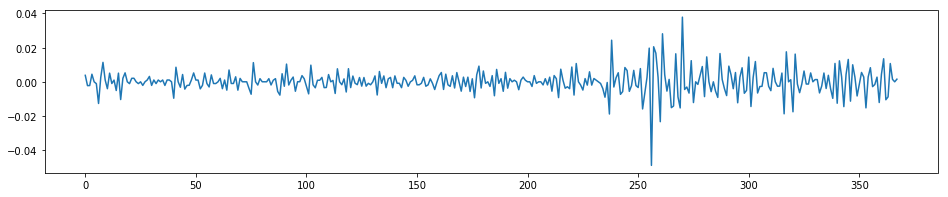

In [13]:
plt.plot(w_j)